In [226]:
%matplotlib inline
import numpy as np
import scipy
from scipy.interpolate import BSpline
from scipy.interpolate import _bspl

import matplotlib.pyplot as plt

import plotter
import plot_comparison as pc
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
rval = 0
sigma = 3.0
rmin = 1
rmax = 150
nrbins = 300
ngbins = int((8*sigma)/((rmax-rmin)/float(nrbins)))
print(ngbins)
gbins = np.linspace(-4*sigma, 4*sigma, ngbins)
gs = 0.5*(gbins[:-1]+gbins[1:])
u = np.zeros(len(gs))
for i in range(len(gs)):
    g = gs[i]
    if abs(g-rval)<4*sigma:
        gaussian = 1.0/(np.sqrt(2.0*np.pi)*sigma) * np.exp(-0.5*((g-rval)/sigma)**2)
        u[i] = gaussian
        
print(u)

48
[6.24748278e-05 1.19898122e-04 2.23530683e-04 4.04836223e-04
 7.12260787e-04 1.21735196e-03 2.02120673e-03 3.26003877e-03
 5.10801598e-03 7.77497824e-03 1.14964451e-02 1.65137388e-02
 2.30433016e-02 3.12364341e-02 4.11334984e-02 5.26195706e-02
 6.53907628e-02 7.89410613e-02 9.25778244e-02 1.05469875e-01
 1.16725932e-01 1.25494218e-01 1.31068261e-01 1.32980760e-01
 1.31068261e-01 1.25494218e-01 1.16725932e-01 1.05469875e-01
 9.25778244e-02 7.89410613e-02 6.53907628e-02 5.26195706e-02
 4.11334984e-02 3.12364341e-02 2.30433016e-02 1.65137388e-02
 1.14964451e-02 7.77497824e-03 5.10801598e-03 3.26003877e-03
 2.02120673e-03 1.21735196e-03 7.12260787e-04 4.04836223e-04
 2.23530683e-04 1.19898122e-04 6.24748278e-05]


In [115]:
sum(u)*(max(rs)-min(rs))/len(rs)

0.9693365944936406

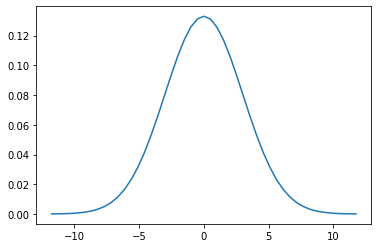

In [116]:
plt.plot(gs, u)

49
0.9999510819380507


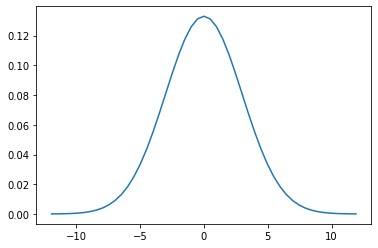

In [125]:
ncont = 300
deltar = (rmax-rmin)/float(ncont)
gs_pos = np.arange(0, 4*sigma, step=deltar)
gs_neg = np.arange(0, -4*sigma, step=-deltar)
gs_neg = gs_neg[1:][::-1]
gs = np.concatenate((gs_neg, gs_pos))
print(len(gs))

def gaussian(x, mu, sigma):
    return 1.0/(np.sqrt(2.0*np.pi)*sigma) * np.exp(-0.5*((x-mu)/sigma)**2)

u = gaussian(gs, 0, 3.0)
print(sum(u)*deltar)
plt.plot(gs, u)

In [211]:
def plot_lognormal(tag, cat_tag, proj_types, plot_tag=None, log=False, standard=False):
    result_dir = '../results/results_lognormal{}'.format(cat_tag)
    cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)
    
    rs_lin = []
    cfs_lin = []
    colors = []
    labels = []
    if standard:
        r_stan_lin, xi_stan_lin, label_stan = np.load('{}/cf_lin_{}{}_seed0.npy'.format(result_dir, 'standard', tag), allow_pickle=True, encoding='latin1')
        rs_lin.append(r_stan_lin)
        cfs_lin.append(xi_stan_lin)
        colors.append(color_dict['standard'])
        labels.append('standard')
        
    if log:
        r_stan_log, xi_stan_log, label_stan = np.load('{}/cf_log_{}{}.npy'.format(result_dir, 'standard', tag), allow_pickle=True, encoding='latin1')
        rs_log = [r_stan_log]
        cfs_log = [xi_stan_log]

    for proj_type in proj_types:

        r_lin, xi_proj_lin, projt = np.load('{}/cf_lin_{}{}_seed0.npy'.format(result_dir, proj_type, tag), allow_pickle=True, encoding='latin1')
        print(len(r_lin))
        print(len(xi_proj_lin))
        rs_lin.append(r_lin)
        cfs_lin.append(xi_proj_lin)
        if log:
            r_log, xi_proj_log, projt = np.load('{}/cf_log_{}{}.npy'.format(result_dir, proj_type, tag), allow_pickle=True, encoding='latin1')
            rs_log.append(r_log)
            cfs_log.append(xi_proj_log)

    colors += [get_color(pt) for pt in proj_types]
    labels += [get_label(pt) for pt in proj_types]

    r_true_lin, xi_true_lin, label_true = np.load('{}/cf_lin_{}{}.npy'.format(cat_dir, 'true', cat_tag), allow_pickle=True, encoding='latin1')
    print(len(r_true_lin))
    if plot_tag:
        save_lin = '{}/cf_lin{}{}.png'.format(plot_dir, tag, plot_tag)
    else:
        save_lin = None
    ax = plotter.plot_cf_cont(rs_lin, cfs_lin, r_true_lin, xi_true_lin, labels, colors, saveto=save_lin, log=False, err=True)

    if log:
        r_true_log, xi_true_log, label_true = np.load('{}/cf_log_{}{}.npy'.format(cat_dir, 'true', cat_tag), allow_pickle=True, encoding='latin1')
        save_log = '{}/cf_log{}{}.png'.format(plot_dir, tag, plot_tag)
        plotter.plot_cf_cont(rs_log, cfs_log, r_true_log, xi_true_log, labels, colors, saveto=save_log, log=True, err=True)

    return ax


In [245]:
plot_dir = '../plots/plots_2019-10-03'
result_dir = '../results/results_2019-10-03'
cat_dir = '../catalogs/catalogs_2019-09-30'
def get_label(pt):
    label_dict = {'generalr': 'cosmo deriv', 'tophat': 'tophat', 'piecewise':'triangle', 'linear_spline':'linear spline', 'quadratic_spline': 'quadratic spline', 'quadratic_spline_nbins8':'quadratic spline (8 bins)', 'gaussian_kernel':'gaussian kernel'}
    for k in label_dict.keys():
        if pt in k:
            return label_dict[k]
    else:
        return pt

def get_color(pt):
    color_dict = {'tophat':'blue', 'standard': 'orange', 'piecewise':'crimson', 'linear_spline':'red', 'cosmo deriv':'purple', 'triangle':'crimson', 'quadratic_spline':'green', 'quadratic_spline_nbins8':'limegreen', 'gaussian_kernel':'blue'}
    for k in color_dict.keys():
        if pt in k:
            return color_dict[k]
    else:
        return 'blue'

In [234]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)

300
300
300
plotting


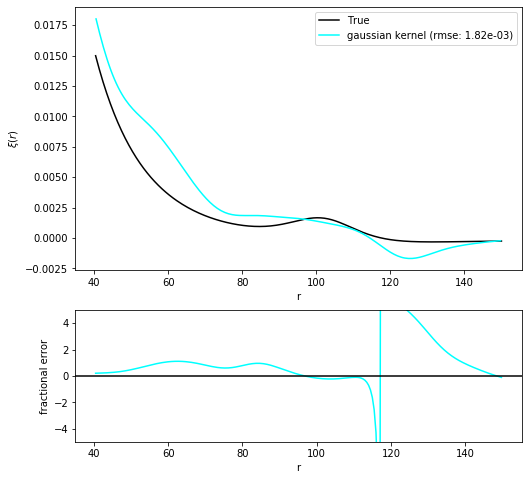

In [235]:
tag = cat_tag+''
proj_types = ['gaussian_kernel_sig6']#, 'tophat']
ax = plot_lognormal(tag, cat_tag, proj_types)
#ax[0].set_ylim(-0.1, 0.2)

plotting


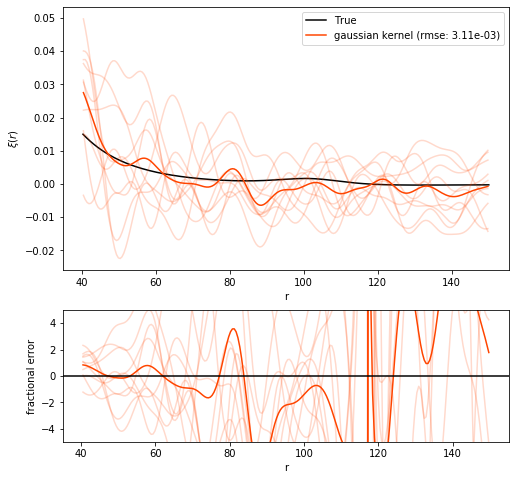

In [253]:
boxsize = 750
nbar_str = '1e-5'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
plot_tag = '_gaussian_kernel'

#proj_tags = ['quadratic']
proj_tags = ['gaussian_kernel']
pc.plot_lognormal_multi(tag, cat_tag, proj_tags, plot_tag=plot_tag, nrealizations=10)

plotting


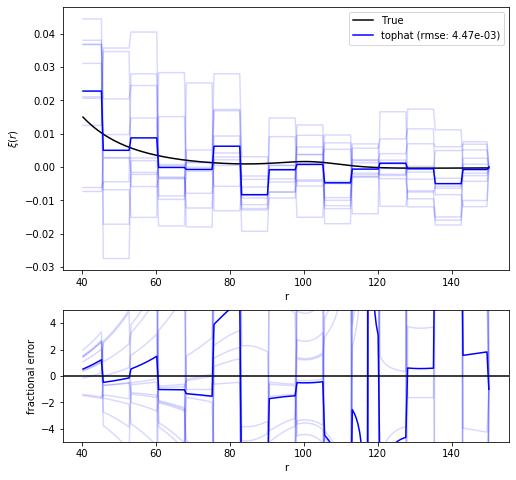

In [259]:
boxsize = 750
nbar_str = '1e-5'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
plot_tag = '_tophat'

#proj_tags = ['quadratic']
proj_tags = ['tophat']
pc.plot_lognormal_multi(tag, cat_tag, proj_tags, plot_tag=plot_tag, nrealizations=10)

plotting


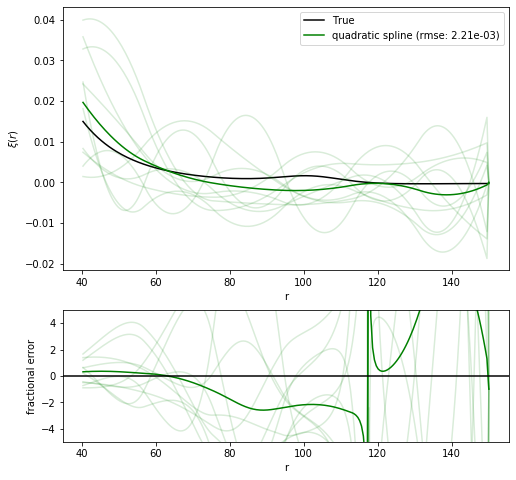

In [267]:
boxsize = 750
nbar_str = '1e-5'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
plot_tag = '_quadratic_n10'

#proj_tags = ['quadratic']
proj_tags = ['quadratic_n10']
pc.plot_lognormal_multi(tag, cat_tag, proj_tags, plot_tag=plot_tag, nrealizations=10)

plotting


(-2, 2)

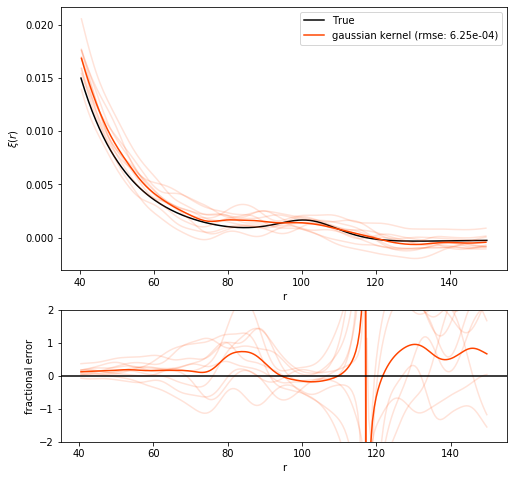

In [289]:
boxsize = 750
nbar_str = '3e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
plot_tag = '_gaussian_kernel'

#proj_tags = ['quadratic']
proj_tags = ['gaussian_kernel']
ax = pc.plot_lognormal_multi(tag, cat_tag, proj_tags, plot_tag=plot_tag, nrealizations=10)
print(ax)
ax[1].set_ylim(-2,2)

plotting


(-2, 2)

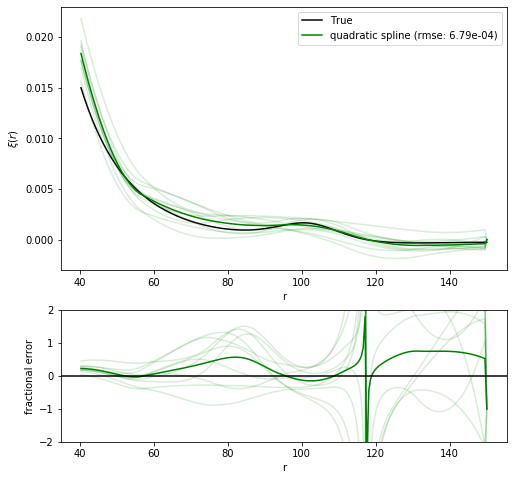

In [287]:
boxsize = 750
nbar_str = '3e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
plot_tag = '_quadratic_n10'

#proj_tags = ['quadratic']
proj_tags = ['quadratic_n10']
ax = pc.plot_lognormal_multi(tag, cat_tag, proj_tags, plot_tag=plot_tag, nrealizations=10)
ax[1].set_ylim(-2,2)

plotting


(-2, 2)

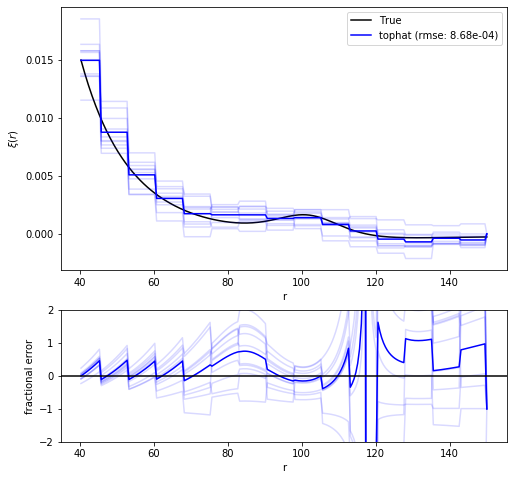

In [288]:
boxsize = 750
nbar_str = '3e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
plot_tag = '_tophat'

#proj_tags = ['quadratic']
proj_tags = ['tophat']
ax = pc.plot_lognormal_multi(tag, cat_tag, proj_tags, plot_tag=plot_tag, nrealizations=10)
ax[1].set_ylim(-2,2)